# Imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
pd.options.display.max_colwidth = 200

## Loading original data and filtering by legislature

In [22]:
party_dict = pd.read_csv('drive/MyDrive/IEEE Latin America Transactions/info_deputados.csv').set_index('party_id')['party'].squeeze().to_dict()

In [23]:
df_speeches_merged = pd.read_csv('drive/MyDrive/IEEE Latin America Transactions/info_speeches.csv').drop(columns=['type']).dropna()
df_speeches_merged = df_speeches_merged.rename(columns={'transcript': 'transcricao'})
df_speeches_merged = df_speeches_merged[df_speeches_merged.term == 54]

In [24]:
groups = df_speeches_merged.groupby(['congressman_id', 'term'])
groups = groups.apply(lambda x: pd.Series({'party_id': x.party_id.iloc[0], 'speeches': list(x.transcricao)}))
array_parties, lists_discursos = groups.values.T

Separating deputies by party

In [25]:
uniq_partidos = np.unique(array_parties)
df_congressmen_by_parties = [(party_dict[p], (array_parties == p).sum()) for i, p in enumerate(uniq_partidos)]

In [26]:
df_congressmen_by_parties = pd.DataFrame(df_congressmen_by_parties)
df_congressmen_by_parties.rename(columns={0:'Partido', 1:'Tamanho'}, inplace=True)

Detailed statement of the number of parliamentarians per party

In [27]:
df_congressmen_by_parties = df_congressmen_by_parties[df_congressmen_by_parties.Tamanho > 2]
df_congressmen_by_parties

,Partido,Tamanho
1,PROS,21
2,SDD,23
3,DEM,31
4,PCdoB,16
5,PDT,21
6,PMDB,93
7,PMN,3
8,PP**,44
9,PPS,9
10,PR,32


Graph representing the size of each party

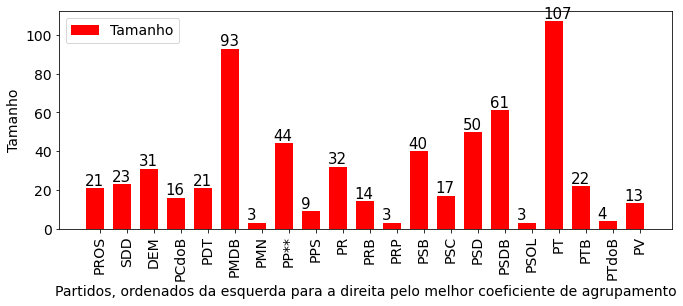

In [28]:
plt.rcParams.update({'font.size': 14})
fig, ax1 = plt.subplots(figsize=(11,4))
ax1.bar(np.arange(len(df_congressmen_by_parties))*3, df_congressmen_by_parties['Tamanho'], color='r', label='Tamanho',width=2)
for i, v in enumerate(df_congressmen_by_parties['Tamanho']):
    ax1.text(x=i * 3- 1.2, y =v +1.5 , s=f"{v}" , fontdict=dict(fontsize=15))

ax1.set_xticks(np.arange(len(df_congressmen_by_parties))*3+0.5)
ax1.set_xticklabels(df_congressmen_by_parties['Partido'], rotation=90)
ax1.set_ylabel('Tamanho')
ax1.legend(loc=2)
ax1.set_xlabel('Partidos, ordenados da esquerda para a direita pelo melhor coeficiente de agrupamento')

plt.savefig('b.pdf', bbox_inches='tight')